In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
feat = 'lfp_mid'
reg = pd.read_csv(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/searchlight_regions_{feat}.csv')
all_reg = pd.read_csv(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/localization_{feat}.csv')

In [79]:
reg = reg.assign(unique_id = reg.subj.astype(str) + reg.electrode_name)
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
subj              117 non-null int64
space             117 non-null object
electrode_name    117 non-null object
unique_id         117 non-null object
dtypes: int64(1), object(3)
memory usage: 3.7+ KB


In [80]:
all_reg = all_reg.assign(unique_id = all_reg.subj.astype(str) + all_reg.electrode_name)
all_reg['hem'] = all_reg.Talairach_labels_1mm_label.apply(lambda x: x.split()[0])
all_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 43 columns):
electrode_name                                                     920 non-null object
x_coordinate                                                       920 non-null float64
y_coordinate                                                       920 non-null float64
z_coordinate                                                       920 non-null float64
tissue_segmentation_label                                          920 non-null object
tissue_segmentation_distance_from_label_2                          920 non-null float64
AAL_label                                                          920 non-null object
AAL2_label                                                         920 non-null object
AAL3v1_1mm_label                                                   920 non-null object
AAL_JHU_combined_label                                             920 non-null object
AICHA_label          

In [81]:
reg = reg.merge(all_reg, on=['unique_id', 'subj', 'electrode_name'])
reg['AAL_no_hem'] = reg.AAL_label.apply(lambda x: x[0:-2])
reg['tal_no_hem'] = reg.Talairach_labels_1mm_label.apply(lambda x: "".join(x.split()[1:]))
reg['hem'] = reg.Talairach_labels_1mm_label.apply(lambda x: x.split()[0])
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 116
Data columns (total 46 columns):
subj                                                               117 non-null int64
space                                                              117 non-null object
electrode_name                                                     117 non-null object
unique_id                                                          117 non-null object
x_coordinate                                                       117 non-null float64
y_coordinate                                                       117 non-null float64
z_coordinate                                                       117 non-null float64
tissue_segmentation_label                                          117 non-null object
tissue_segmentation_distance_from_label_2                          117 non-null float64
AAL_label                                                          117 non-null object
AAL2_label            

In [82]:
all_reg['AAL_no_hem'] = all_reg.AAL_label.apply(lambda x: x[0:-2])
avg = all_reg['AAL_no_hem'].value_counts().reset_index(name='total_counts')
avg.rename(columns={'index':'AAL_no_hem'}, inplace=True)
avg_hem = all_reg['hem'].value_counts().reset_index(name='total_counts')
avg_hem.rename(columns={'index':'hem'}, inplace=True)


avg.head()

,AAL_no_hem,total_counts
0,NotInAtl,259
1,Temporal_Mid,121
2,Temporal_Inf,108
3,Frontal_Inf_Tri,52
4,Hippocampus,51


In [83]:
avg_hem.head()

,hem,total_counts
0,Left,608
1,Right,287
2,NotInAtlas,25


In [84]:
sig_avg = reg.groupby('space').AAL_no_hem.value_counts().reset_index(name='sig_counts')
sig_avg = sig_avg.merge(avg, on='AAL_no_hem')
sig_avg = sig_avg.assign(percent = sig_avg.sig_counts/sig_avg.total_counts)
sig_avg.head()

,space,AAL_no_hem,sig_counts,total_counts,percent
0,euclid,NotInAtl,11,259,0.042471
1,latent,NotInAtl,18,259,0.069498
2,euclid,Temporal_Mid,10,121,0.082645
3,latent,Temporal_Mid,10,121,0.082645
4,euclid,Temporal_Inf,9,108,0.083333


In [85]:
sig_avg_hem = reg.groupby('space').hem.value_counts().reset_index(name='sig_counts')
sig_avg_hem = sig_avg_hem.merge(avg_hem, on='hem')
sig_avg_hem = sig_avg_hem.assign(percent = sig_avg_hem.sig_counts/sig_avg_hem.total_counts)
sig_avg_hem.head(6)

,space,hem,sig_counts,total_counts,percent
0,euclid,Left,46,608,0.075658
1,latent,Left,39,608,0.064145
2,euclid,Right,13,287,0.045296
3,latent,Right,12,287,0.041812
4,euclid,NotInAtlas,6,25,0.240000
5,latent,NotInAtlas,1,25,0.040000


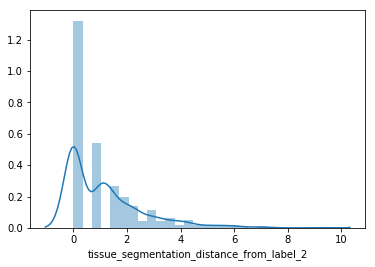

In [86]:
sns.distplot(all_reg.tissue_segmentation_distance_from_label_2)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

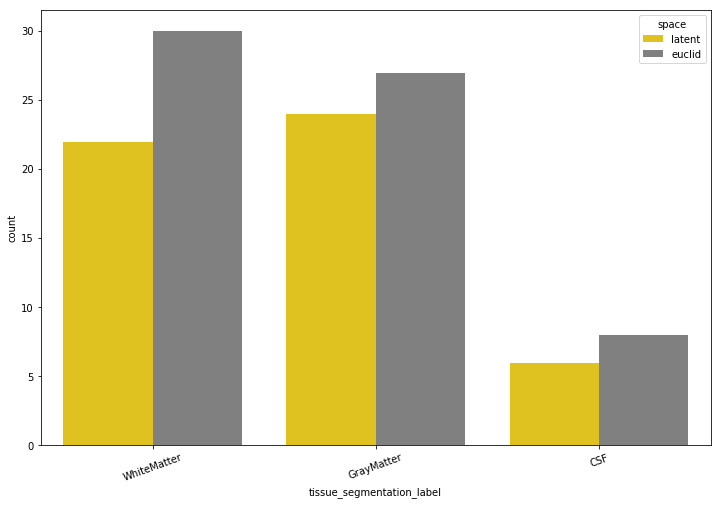

In [87]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='tissue_segmentation_label', hue='space', palette = ['gold','grey'])
plt.xticks(rotation=20)

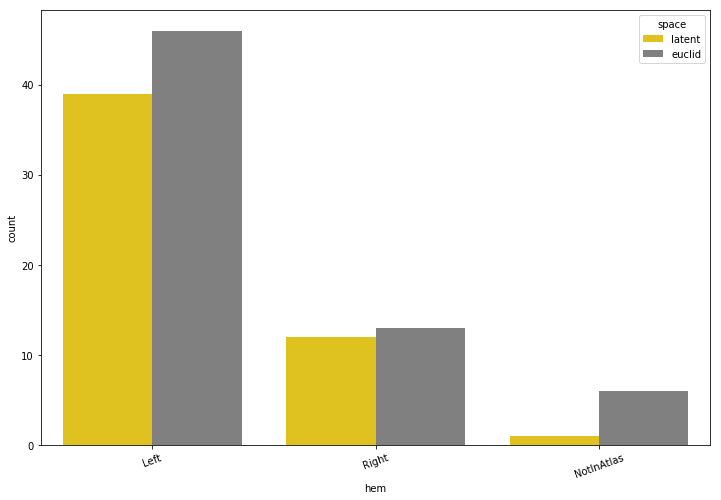

In [88]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='hem', hue='space', palette = ['gold','grey'])
plt.xticks(rotation=20)
plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_img/hems_{feat}.pdf')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

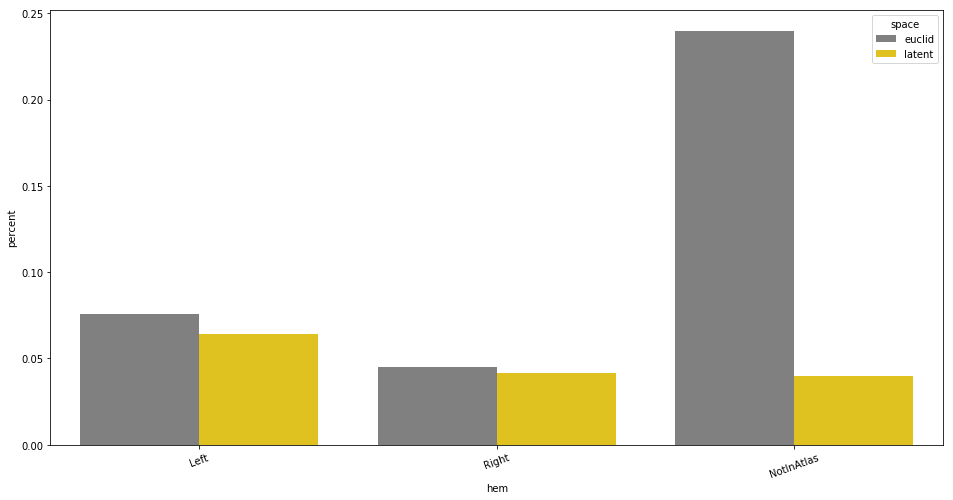

In [89]:
fig = plt.figure(figsize=(16,8))
sns.barplot(data=sig_avg_hem, x='hem', y='percent', hue='space', 
              palette = ['grey','gold'])
plt.xticks(rotation=20)

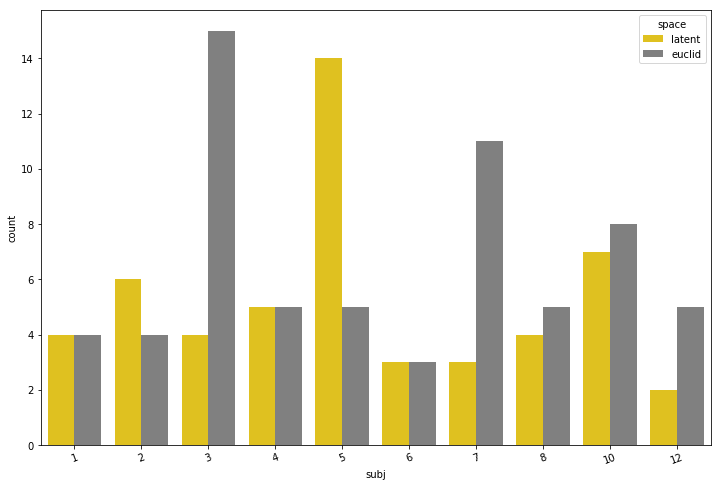

In [90]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='subj', hue='space', palette = ['gold','grey'])
plt.xticks(rotation=20)
plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_img/subj_contacs_{feat}.pdf')

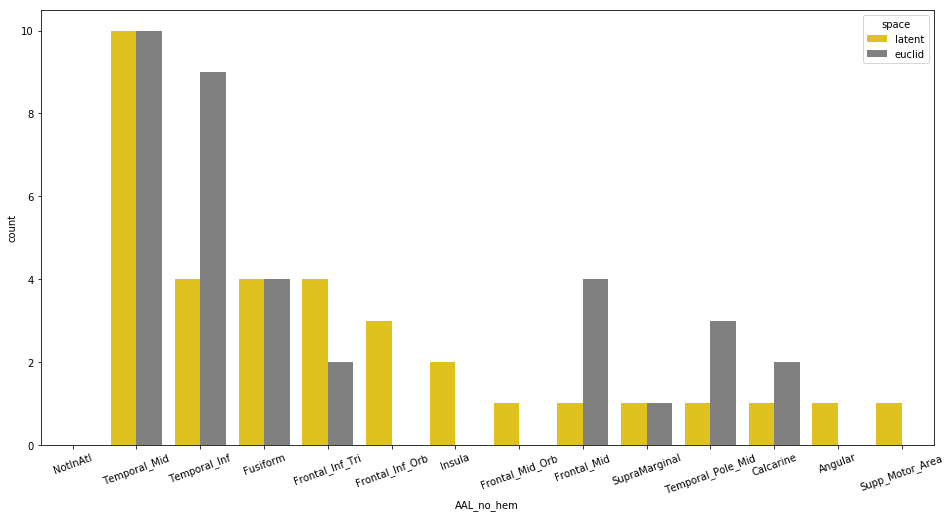

In [91]:
fig = plt.figure(figsize=(16,8))
atlas = 'AAL_no_hem'
sns.countplot(data=reg[reg.AAL_label != 'NotInAtlas'], x=atlas, hue='space', 
              palette = ['gold','grey'],
              order = reg.loc[(reg.space == 'latent'),atlas].value_counts().index)
plt.xticks(rotation=20)
plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_img/gm_regions_{feat}.pdf')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

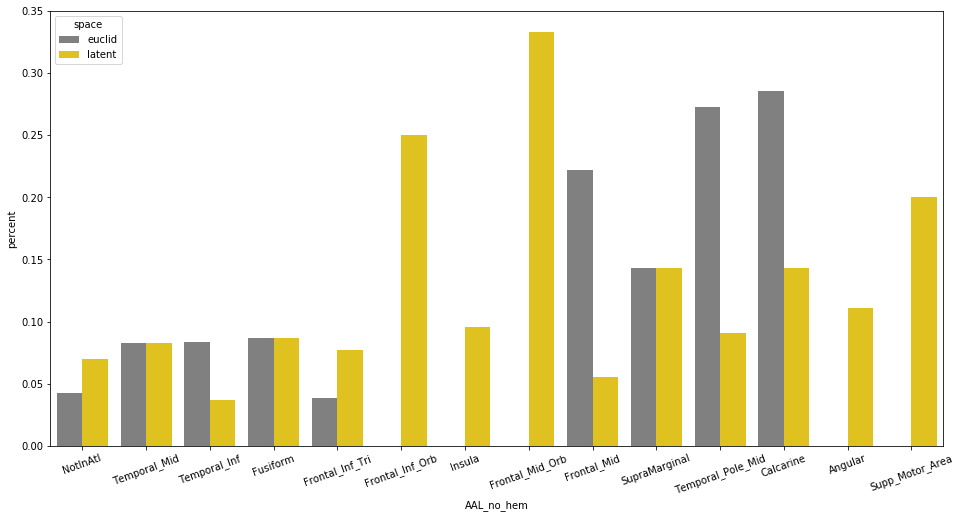

In [92]:
fig = plt.figure(figsize=(16,8))
sns.barplot(data=sig_avg, x='AAL_no_hem', y='percent', hue='space', 
              palette = ['grey','gold'],
              order = reg.loc[(reg.space == 'latent'),'AAL_no_hem'].value_counts().index)
plt.xticks(rotation=20)

In [93]:
sig_avg[['space','AAL_no_hem','percent']]

,space,AAL_no_hem,percent
0,euclid,NotInAtl,0.042471
1,latent,NotInAtl,0.069498
2,euclid,Temporal_Mid,0.082645
3,latent,Temporal_Mid,0.082645
4,euclid,Temporal_Inf,0.083333
5,latent,Temporal_Inf,0.037037
6,euclid,Hippocampus,0.117647
7,euclid,Frontal_Mid,0.222222
8,latent,Frontal_Mid,0.055556
9,euclid,Fusiform,0.086957


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

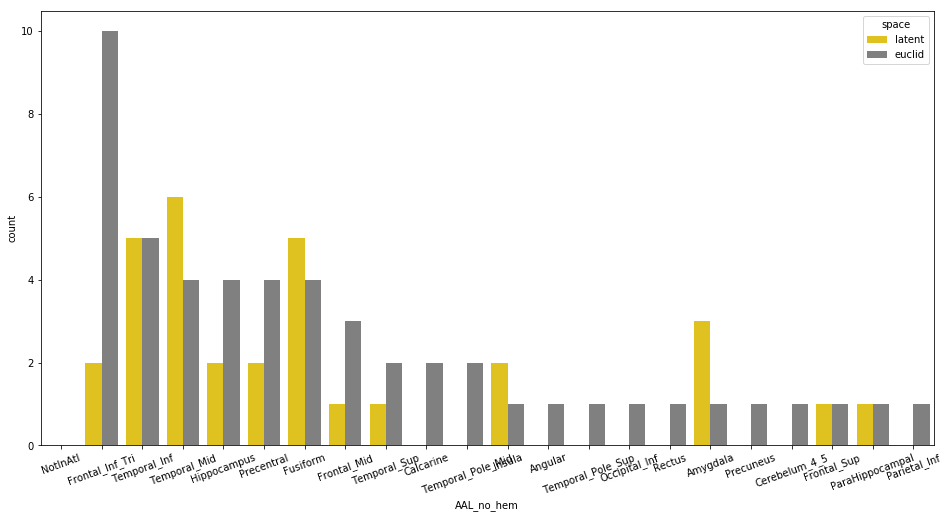

In [31]:
fig = plt.figure(figsize=(16,8))
atlas = 'AAL_no_hem'
sns.countplot(data=reg[reg.AAL_label != 'NotInAtlas'], x=atlas, hue='space', 
              palette = ['gold','grey'],
              order = reg.loc[(reg.space == 'euclid'),atlas].value_counts().index)
plt.xticks(rotation=20)

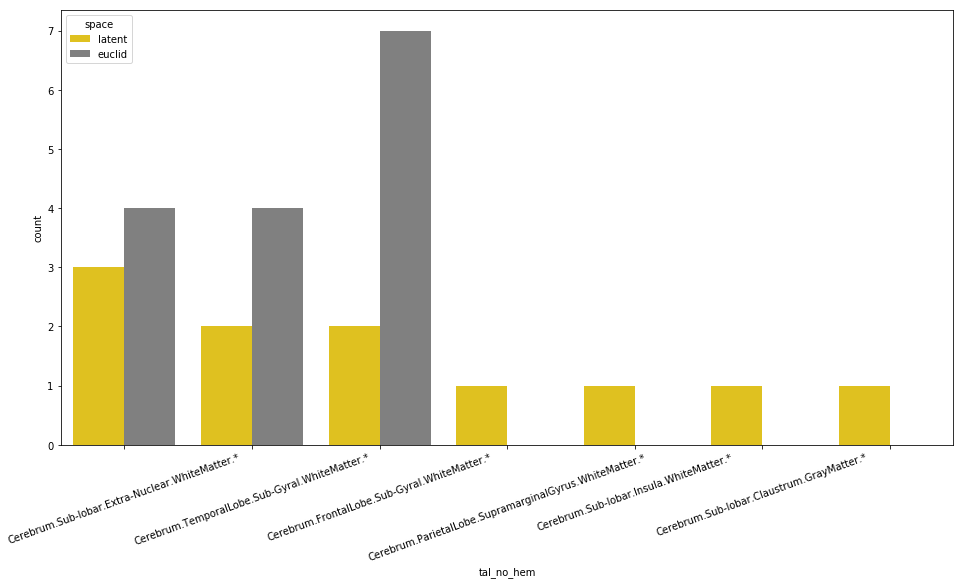

In [32]:
fig = plt.figure(figsize=(16,8))
atlas = 'tal_no_hem'
sns.countplot(data=reg[reg.AAL_label == 'NotInAtlas'], x=atlas, hue='space', palette = ['gold','grey'],
             order = reg.loc[(reg.AAL_label == 'NotInAtlas') & (reg.space == 'latent'),atlas].value_counts().index)
plt.xticks(rotation=20)
plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_img/wm_regions_{feat}.pdf')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

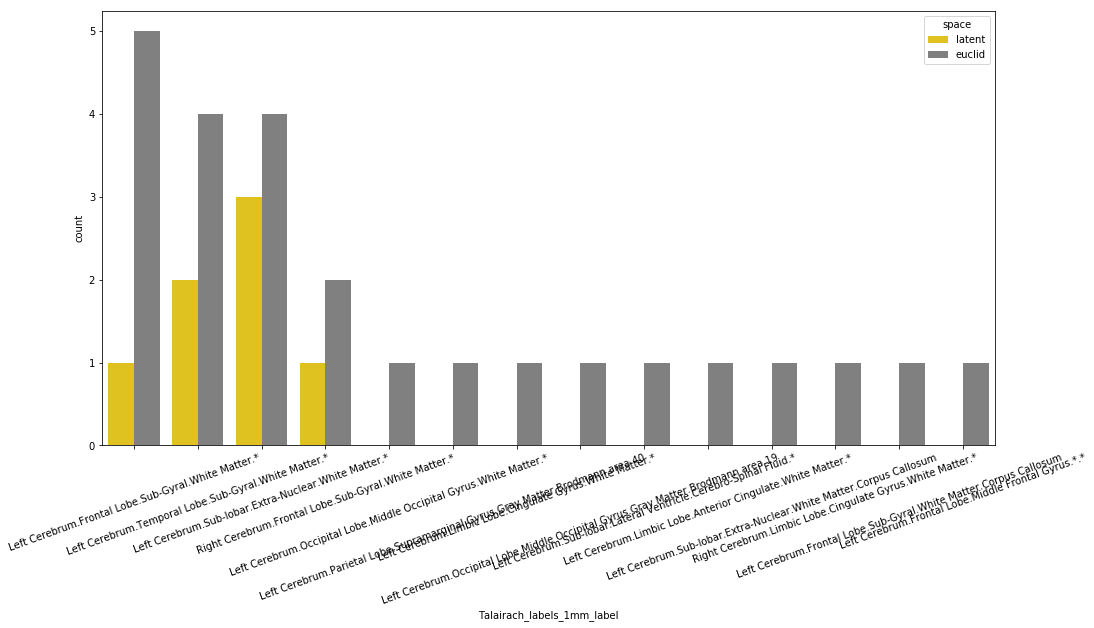

In [33]:
fig = plt.figure(figsize=(16,8))
atlas = 'Talairach_labels_1mm_label'
sns.countplot(data=reg[reg.AAL_label == 'NotInAtlas'], x=atlas, hue='space', palette = ['gold','grey'],
             order = reg.loc[(reg.AAL_label == 'NotInAtlas') & (reg.space == 'euclid'),atlas].value_counts().index)
plt.xticks(rotation=20)

5.09901951359278
0.0


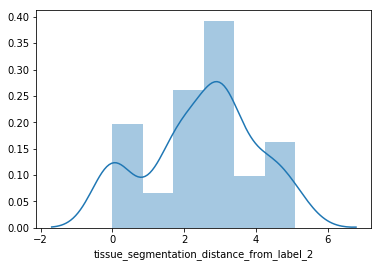

In [34]:
print(reg[reg.AAL_label == 'NotInAtlas'].tissue_segmentation_distance_from_label_2.max())
print(reg[reg.AAL_label == 'NotInAtlas'].tissue_segmentation_distance_from_label_2.min())
sns.distplot(reg[reg.AAL_label == 'NotInAtlas'].tissue_segmentation_distance_from_label_2)

In [35]:
reg[reg.AAL_label == 'NotInAtlas']

,subj,space,electrode_name,unique_id,x_coordinate,y_coordinate,z_coordinate,tissue_segmentation_label,tissue_segmentation_distance_from_label_2,AAL_label,...,Schaefer2018_800Parcels_17Networks_order_FSLMNI152_1mm_label,Schaefer2018_900Parcels_17Networks_order_FSLMNI152_1mm_label,Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_1mm_label,Talairach_labels_1mm_region_number,Talairach_labels_1mm_label,Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_resliced_label,Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_resliced_label,hem,AAL_no_hem,tal_no_hem
2,1,latent,LI04,1LI04,-24.88220,0.834579,14.616437,WhiteMatter,1.732051,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,439,Left Cerebrum.Sub-lobar.Insula.White Matter.*,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.Sub-lobar.Insula.WhiteMatter.*
3,1,latent,LI05,1LI05,-23.85100,-0.834554,18.609980,WhiteMatter,2.828427,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,347,Left Cerebrum.Sub-lobar.Extra-Nuclear.White Ma...,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.Sub-lobar.Extra-Nuclear.WhiteMatter.*
8,2,latent,RE01,2RE01,30.95840,50.765000,-16.334416,GrayMatter,0.000000,NotInAtlas,...,17Networks_RH_LimbicA_TempPole_2,17Networks_RH_LimbicA_TempPole_3,17Networks_RH_LimbicA_TempPole_10,0,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtl,
19,3,latent,LB06,3LB06,-33.17600,-9.924140,-17.406782,WhiteMatter,3.000000,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,347,Left Cerebrum.Sub-lobar.Extra-Nuclear.White Ma...,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.Sub-lobar.Extra-Nuclear.WhiteMatter.*
20,3,latent,LB07,3LB07,-36.87830,-13.436200,-16.376385,WhiteMatter,3.741657,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,51,Left Cerebrum.Temporal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.TemporalLobe.Sub-Gyral.WhiteMatter.*
21,3,latent,LB09,3LB09,-43.81480,-19.506800,-14.232142,GrayMatter,0.000000,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,51,Left Cerebrum.Temporal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.TemporalLobe.Sub-Gyral.WhiteMatter.*
23,3,latent,LH05,3LH05,-18.45130,-29.542500,7.166672,WhiteMatter,4.242641,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,347,Left Cerebrum.Sub-lobar.Extra-Nuclear.White Ma...,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.Sub-lobar.Extra-Nuclear.WhiteMatter.*
24,4,latent,LA06,4LA06,-36.76680,6.064190,-21.525584,GrayMatter,0.000000,NotInAtlas,...,17Networks_LH_SalVentAttnA_Ins_3,17Networks_LH_SalVentAttnA_Ins_5,17Networks_LH_SalVentAttnA_Ins_6,449,Left Cerebrum.Sub-lobar.Claustrum.Gray Matter.*,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.Sub-lobar.Claustrum.GrayMatter.*
40,8,latent,LF05,8LF05,-28.15550,12.779600,36.919185,WhiteMatter,1.732051,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,193,Left Cerebrum.Frontal Lobe.Sub-Gyral.White Mat...,NotInAtlas,NotInAtlas,Left,NotInAtl,Cerebrum.FrontalLobe.Sub-Gyral.WhiteMatter.*
45,10,latent,RH11,10RH11,34.39130,21.654000,13.397179,WhiteMatter,5.099020,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,194,Right Cerebrum.Frontal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,Right,NotInAtl,Cerebrum.FrontalLobe.Sub-Gyral.WhiteMatter.*


In [36]:
# print regions for a given subj
all_reg.loc[all_reg['subj'] == 12, 'AAL_label'].unique()

array(['NotInAtlas', 'Amygdala_L', 'Temporal_Mid_L', 'Hippocampus_L',
       'Temporal_Inf_L', 'Temporal_Sup_L', 'Cingulum_Post_L',
       'SupraMarginal_L', 'Frontal_Inf_Tri_L', 'Insula_L', 'Heschl_L',
       'Frontal_Sup_Orb_L', 'Rectus_L', 'Frontal_Inf_Orb_L',
       'Temporal_Pole_Sup_L'], dtype=object)

In [37]:
#save table of all regions: region, total count, visual count, visual percent, latent count, latent percent, 
all_reg['AAL_no_hem'] = all_reg.AAL_label.apply(lambda x: x[0:-2])
avg = all_reg['AAL_no_hem'].value_counts().reset_index(name='total_counts')
avg.rename(columns={'index':'AAL_no_hem'}, inplace=True)
avg.head()

,AAL_no_hem,total_counts
0,NotInAtl,259
1,Temporal_Mid,121
2,Temporal_Inf,108
3,Frontal_Inf_Tri,52
4,Hippocampus,51


In [38]:
gm_avg = reg.groupby('space').AAL_no_hem.value_counts().reset_index(name='sig_counts')
gm_avg = gm_avg.merge(avg, how='outer', on='AAL_no_hem')
gm_avg['space'].fillna(value='latent', inplace=True)
gm_avg = gm_avg.assign(percent = gm_avg.sig_counts/gm_avg.total_counts)
gm_avg[gm_avg['sig_counts'].isna()].head()

,space,AAL_no_hem,sig_counts,total_counts,percent
39,latent,Rolandic_Oper,NaN,12,NaN
40,latent,Occipital_Mid,NaN,9,NaN
41,latent,SupraMarginal,NaN,7,NaN
42,latent,Caudate,NaN,6,NaN
43,latent,Supp_Motor_Area,NaN,5,NaN


In [60]:
supp_gm = gm_avg.pivot(index='AAL_no_hem', columns='space',values=['sig_counts', 'total_counts', 'percent'])
supp_gm.columns = [' '.join(col).strip() for col in supp_gm.columns.values]
# switch to single total column
supp_gm['Total Count'] = supp_gm[['total_counts latent', 'total_counts euclid']].mean(axis=1,skipna=True)
supp_gm.drop(['total_counts latent', 'total_counts euclid'],axis=1, inplace=True)
# format to make it prettier
supp_gm.fillna(value=0,inplace=True)
supp_gm[['percent euclid','percent latent']] = supp_gm[['percent euclid','percent latent']]*100
supp_gm.rename(mapper = {'percent euclid':'Visual (%)',
                        'percent latent':'Latent (%)',
                        'sig_counts euclid':'Visual Count',
                        'sig_counts latent':'Latent Count'}, axis=1, inplace=True)
supp_gm.index.rename('AAL Region', inplace=True)

supp_gm.to_csv(f"/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/supp_gm_{feat}.csv")
supp_gm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Amygdala to Temporal_Sup
Data columns (total 5 columns):
Visual Count    43 non-null float64
Latent Count    43 non-null float64
Visual (%)      43 non-null float64
Latent (%)      43 non-null float64
Total Count     43 non-null float64
dtypes: float64(5)
memory usage: 2.0+ KB


In [58]:
#save table of all regions: region, total count, visual count, visual percent, latent count, latent percent, 

# cut hemisphere from tal atlas
all_reg['tal_no_hem'] = all_reg.Talairach_labels_1mm_label.apply(lambda x: "".join(x.split()[1:]))
avg = all_reg['tal_no_hem'].value_counts().reset_index(name='total_counts')
avg.rename(columns={'index':'tal_no_hem'}, inplace=True)


# merge with sig data
wm_avg = reg.groupby('space').tal_no_hem.value_counts().reset_index(name='sig_counts')
wm_avg = wm_avg.merge(avg, on='tal_no_hem')
wm_avg = wm_avg.assign(percent = wm_avg.sig_counts/sig_avg.total_counts)
supp_wm = wm_avg.pivot(index='tal_no_hem', columns='space',values=['sig_counts', 'total_counts', 'percent'])
supp_wm.columns = [' '.join(col).strip() for col in supp_wm.columns.values]

# switch to single total column
supp_wm['Total Count'] = supp_wm[['total_counts latent', 'total_counts euclid']].mean(axis=1,skipna=True)
supp_wm.drop(['total_counts latent', 'total_counts euclid'],axis=1, inplace=True)

# format to make it prettier
supp_wm.fillna(value=0,inplace=True)
supp_wm[['percent euclid','percent latent']] = supp_wm[['percent euclid','percent latent']]*100
supp_wm.rename(mapper = {'percent euclid':'Visual (%)',
                        'percent latent':'Latent (%)',
                        'sig_counts euclid':'Visual Count',
                        'sig_counts latent':'Latent Count'}, axis=1, inplace=True)
supp_wm.index.rename('Tal. Region', inplace=True)

supp_wm.tail()
supp_wm.to_csv(f"/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/supp_wm_{feat}.csv")

In [61]:
supp_gm

,Visual Count,Latent Count,Visual (%),Latent (%),Total Count
AAL Region,,,,,
Amygdala,1.0,3.0,9.090909,27.272727,11.0
Angular,1.0,0.0,11.111111,0.000000,9.0
Calcarine,2.0,0.0,28.571429,0.000000,7.0
Caudate,0.0,0.0,0.000000,0.000000,6.0
Cerebelum_4_5,1.0,0.0,100.000000,0.000000,1.0
Cingulum_Ant,0.0,0.0,0.000000,0.000000,3.0
Cingulum_Mid,0.0,0.0,0.000000,0.000000,1.0
Cingulum_Post,0.0,1.0,0.000000,16.666667,6.0
Cuneus,0.0,0.0,0.000000,0.000000,1.0
